# CA1 Part B Regression

Name: Ruben Tay <br>
Admin Number: P2222600<br>
Class: DAAA/FT/2A/06

## Problem statement
Using the housing dataset, predict the housing price in US based on various factors

How is your prediction task defined? And what is the meaning of the
output variable?
- The prediction task is to predict the housing price in US based on various factors such as
city, house area, No. of bedrooms and toilets, renovation status, etc. 
- The output variable shows the price of the house in US dollars.

How do you represent your data as features?
- I imported the dataset into a dataframe and then split the datframe into X and y,<br/> where X is the features and y is the target label.

Did you process the features in any way?
- I did encoded the data using various techniques followed by dropping the unnecessary columns and then used a scalar to scale the data.

How did you select which learning algorithms to use?
- I chose the models that are built for accuracy.

Did you try to tune the hyperparameters of the learning algorithm, and in
that case how?
- Yes I used grid search to tune the hyperparameters and used techniques such like L2 Regularization for neural network in the params grid (alpha).

How do you evaluate the quality of your system?
- When testing the model I performed cross-validation and compared the test scores with the training scores to ensure that the models are not overfitted.
- I also used a learning curve, validation scatter plot and a residual plot.

How well does your system compare to a dummy baseline?
- The system compares much better than the dummy baseline and has a much lower mse than the baseline.

Can you say anything about the errors that the system makes?
- The system has a tendency to under predict the price of the house.

Is it possible to say something about which features the model considers
important?
- House Area (sqm) is the most important feature followd by Price per Sqm and Renovation Status.


## Importing libraries

In [3]:
# Basic python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import scipy as sp

# Model evaluation
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, PowerTransformer, StandardScaler

# Models
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Filter Warning
import warnings
warnings.filterwarnings("ignore")

## Data Exploration
Understanding the dataset

Loading the housing dataset as housing_df

In [4]:
housing_df = pd.read_csv('/DAAA_2A06/AIML/CA1/Regression/housing_dataset.csv')
housing_df

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


Finding shape of dataset

In [5]:
housing_df.shape

(545, 8)

Finding the datatype of each column in the dataset

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


Finding if there is any null values in the dataset

In [7]:
housing_df.isnull().sum()

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

In [8]:
housing_df.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


## Features and Labels
Understanding the features and target labels in the credit dataset

#### Features 
- House ID: Unique house identifier ranging from 0 to 544
- City: Which city the house is located
- House Area: Size of the house in square meters
- No. of Bedrooms: How many bedrooms in the house
- No. of Toilets: How many toilets in the house
- Stories: The number of stories in the house
- Renovation Status: How well the house is renovated

#### Target Label
- Price: The price of the house in US dollars

## Exploratory data analysis


### Visualising Dataset

#### Histograms to see distribution of data


<Figure size 640x480 with 0 Axes>

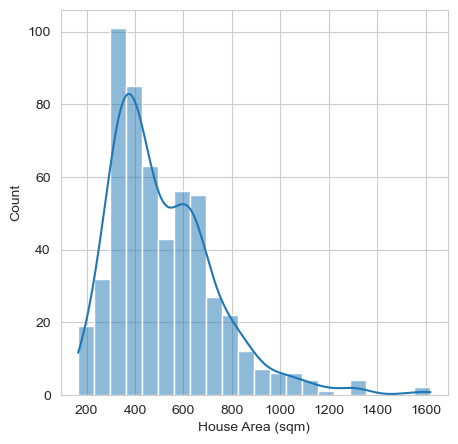

In [9]:
sns.set_style("whitegrid")
sns.despine()
plt.figure(figsize=(5,5))
sns.histplot(housing_df['House Area (sqm)'], kde=True)
plt.ylabel("Count")
plt.show()

In [10]:
ha_mean = np.mean(housing_df['House Area (sqm)'])
print(f'Mean House Area: {ha_mean}')

Mean House Area: 515.0541284403673


We can see above that
House Area is skewed to the right and the mean area is 515sqm.

<Figure size 640x480 with 0 Axes>

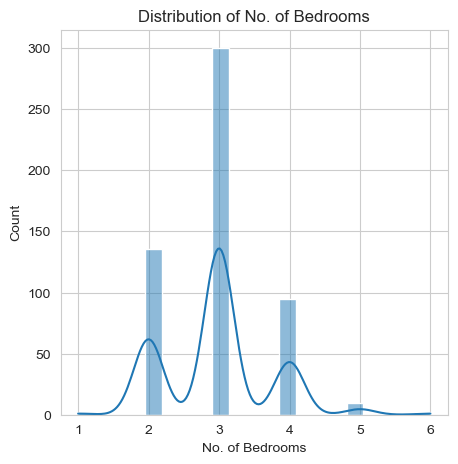

<Figure size 640x480 with 0 Axes>

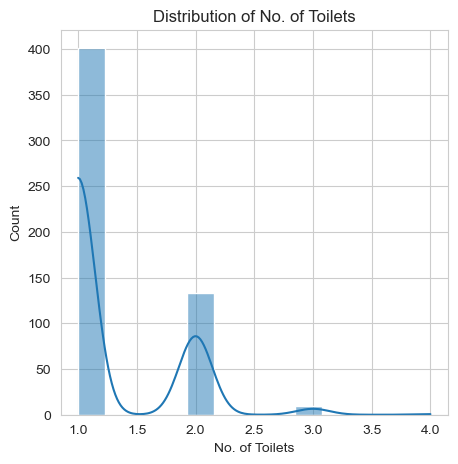

<Figure size 640x480 with 0 Axes>

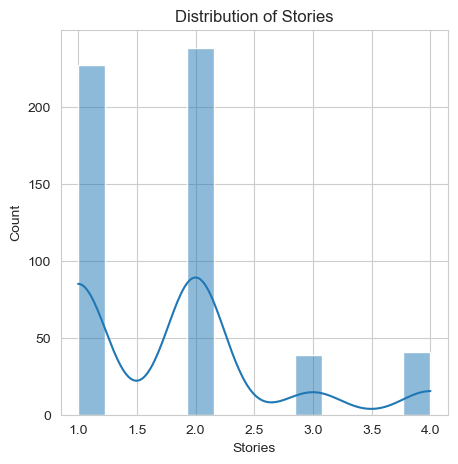

<Figure size 640x480 with 0 Axes>

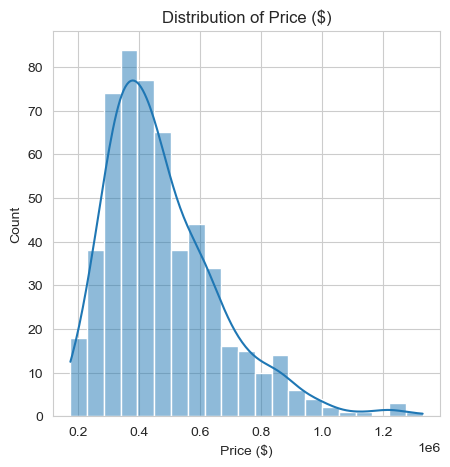

In [11]:
column_names = housing_df.columns[1:]

for column in column_names:
    if housing_df[column].dtype == 'int64':
        sns.set_style("whitegrid")
        sns.despine()
        
        plt.figure(figsize=(5,5))
        
        sns.histplot(housing_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        
        plt.show()

#### Barplot to see counts of the various categorical features

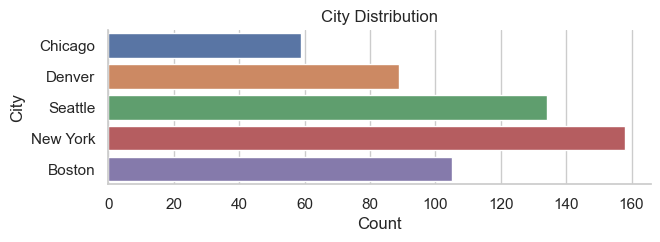

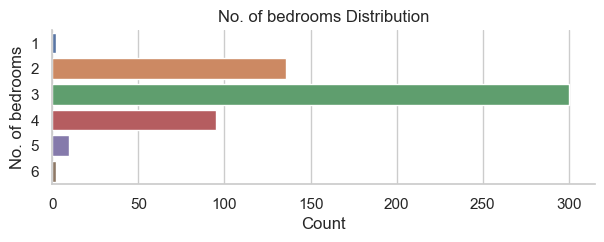

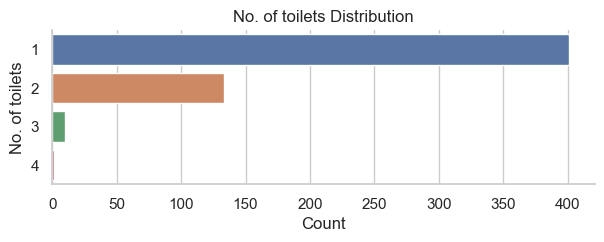

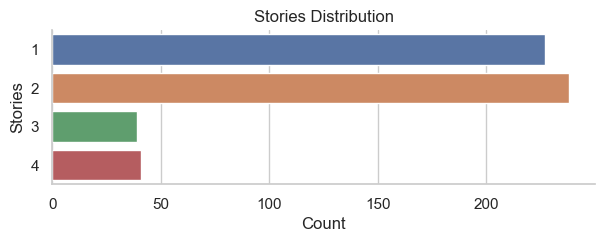

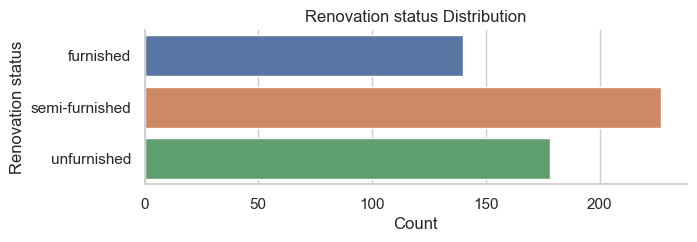

In [ ]:
columns_to_plot = ['City', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Renovation Status']

for column in columns_to_plot:
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(7,2))
    sns.countplot(y=column, data=housing_df)
    
    plt.xlabel('Count')
    plt.ylabel(column.capitalize())
    plt.title(f'{column.capitalize()} Distribution')
    sns.despine()
        
    plt.show()

Some things to note about the graphs above:
- The count of houses in New York are the highest
- Most houses have 3 bedrooms and 1 toliet
- Most houses are semi-furnished

#### Pie chart to show the proportion of data in City column

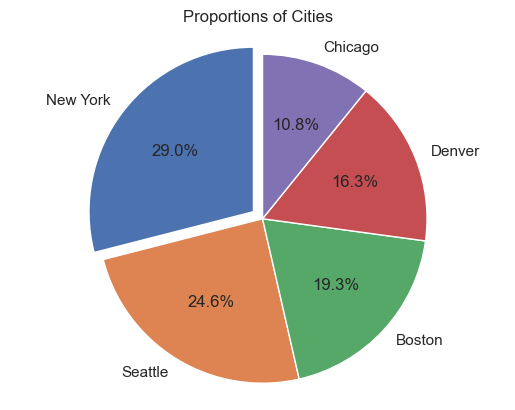

In [ ]:
proportions = housing_df['City'].value_counts(normalize=True) * 100

explode = (0.07,0,0,0,0) 
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90, explode= explode)
plt.title('Proportions of Cities')
plt.axis('equal')
plt.show()

We can see from the pie chart above that the most common city in the dataset is New York,<br/> totaling 29.0% of all the houses recorded in the dataset.
This is followed by Seattle, Boston, Denver and lastly Chicago.

#### Boxplot to show how the prices of housing are distributed across cities

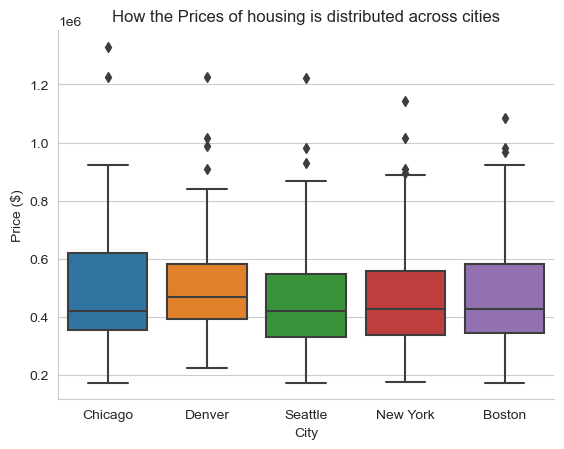

In [16]:
# Create a boxplot
sns.boxplot(x='City', y='Price ($)', data=housing_df)

# Add labels and title
sns.despine()
plt.xlabel('City')
plt.ylabel('Price ($)')
plt.title('How the Prices of housing is distributed across cities')

# Show the plot
plt.show()

- We can see from the boxplots above that the mean price of housing are not too far off from one another.
- However there are some outliers in every city, this could just be because there will always be exceptionally larger houses everywhere.
- One observation is that Chicago has the largest outlier as compared ot the other cities.

#### Using scatterplots to see the correlation between housing price and house area.

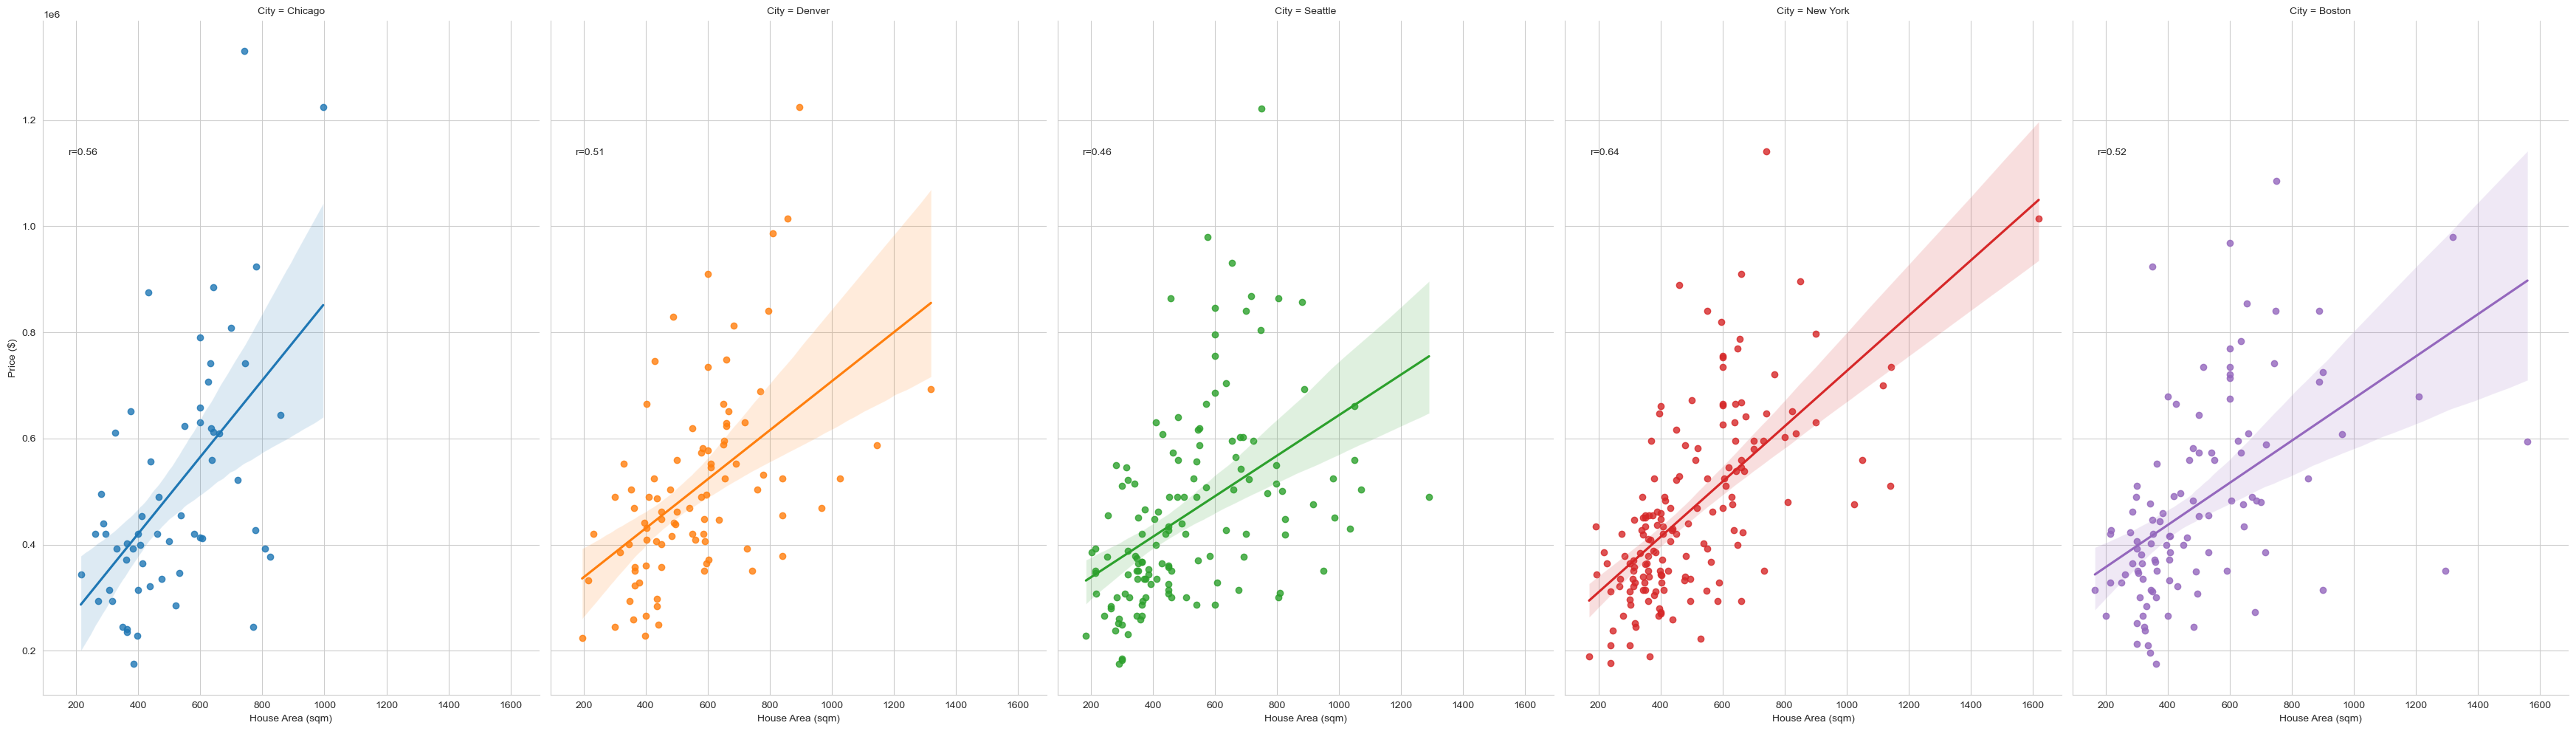

In [18]:
scatter = sns.lmplot(data=housing_df, x="House Area (sqm)", y="Price ($)", col="City", hue="City", height=10, aspect=0.7)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['House Area (sqm)'], data['Price ($)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}'.format(r, p),
            transform=ax.transAxes)
    
scatter.map_dataframe(annotate)
plt.show()

- We can see that price does have a positive correlation with house area.<br/>
- We can also see that the city does affect the price of the houses as shown by the slope of the line.

#### Boxplots of each numerical column

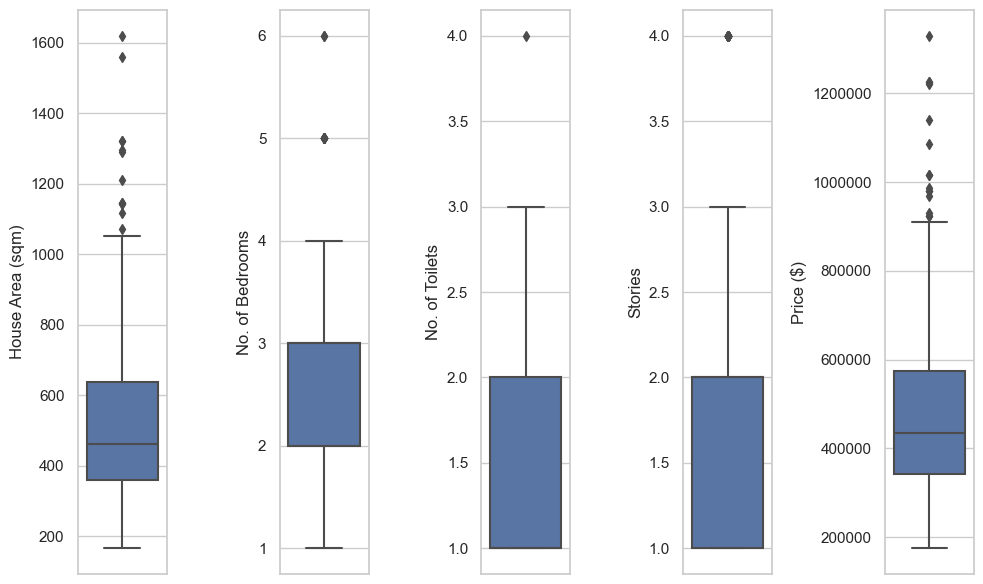

In [ ]:
numerical_features = ['House Area (sqm)','No. of Bedrooms',	'No. of Toilets', 'Stories', 'Price ($)']
fig, ax = plt.subplots(1, len(numerical_features), figsize=(10, 6), tight_layout = True)

for idx, col in enumerate(numerical_features):
    ax[idx].ticklabel_format(useOffset=False, style='plain') # do not use scientific notation
    sns.boxplot(data = housing_df, y=col, ax = ax[idx])
fig.show()

From the boxplots above we can see that:
- There are extreme outlier houses with 5 and 6 bedrooms.
- There are extreme outlier houses with 4 toliets.
- The distribution between House Area and Price are very similar, This is most likely because those outlier houses with a large house area are more likely to be much more expensive than the average house.

#### Using a correlation matrix to figure out the correlation between features and the Target Label

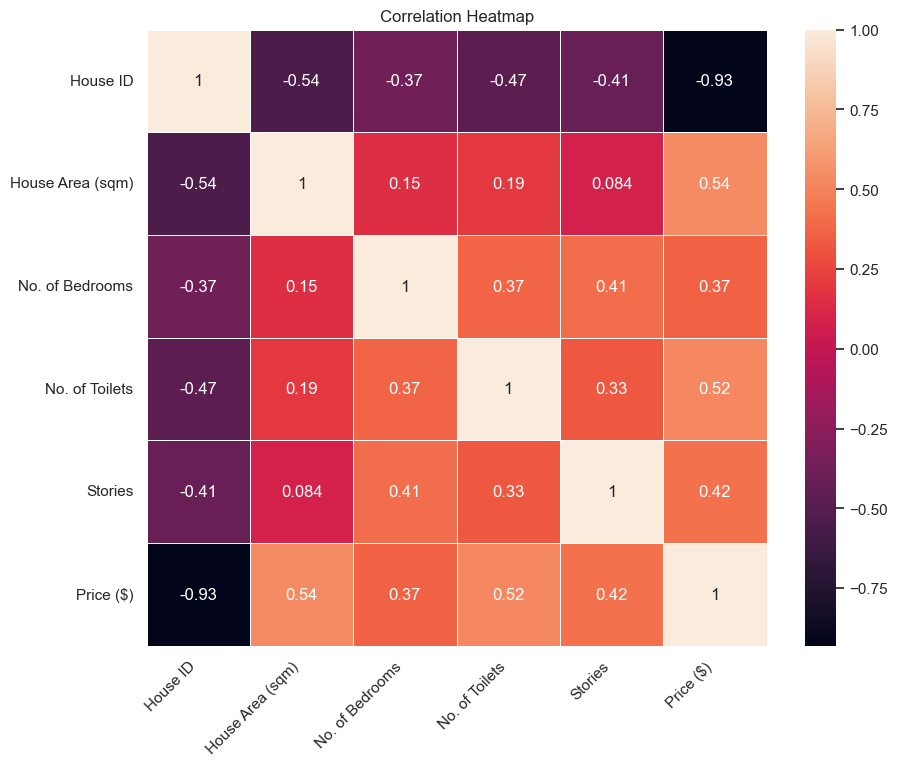

In [ ]:
housingcorr = housing_df.corr()

housingcorr
sns.set(style="white")
plt.figure(figsize= (10,8))
sns.heatmap(housingcorr, annot= True, linewidths= 0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
plt.show()

As shown in the correlation matrix above
- Most of the features have a weak positive correlation with the Target Label
- House ID is an unneccesary feature as it has almost no correlation with the Target Label

# Data Preprocessing
### Preparing our data before we train our algorithm


Dropping unnecessary columns

In [ ]:
housing_df.drop("House ID", axis = 1, inplace=True)

In [ ]:
# Check if feature has been dropped
housing_df

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...
540,Seattle,300.0,2,1,1,unfurnished,182000
541,New York,240.0,3,1,1,semi-furnished,176715
542,Boston,362.0,2,1,1,unfurnished,175000
543,Seattle,291.0,3,1,1,furnished,175000


### Encoding Categorical Columns
Since the columns need to be nominally valued we will encode them

#### label encoding for City

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
housing_df['City'] = labelencoder.fit_transform(housing_df['City'])

#### Ordinal encoding for Renovation Status

In [ ]:
Ordinalencoder = OrdinalEncoder()
housing_df['Renovation Status'] = labelencoder.fit_transform(housing_df['Renovation Status'])

After encoding:

In [ ]:
housing_df

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,1,742.0,4,2,3,0,1330000
1,2,896.0,4,4,4,0,1225000
2,1,996.0,3,2,2,1,1225000
3,4,750.0,4,2,2,0,1221500
4,3,742.0,4,1,2,0,1141000
...,...,...,...,...,...,...,...
540,4,300.0,2,1,1,2,182000
541,3,240.0,3,1,1,1,176715
542,0,362.0,2,1,1,2,175000
543,4,291.0,3,1,1,0,175000


#### We are going to scale the data using Power Transformer as a quick test to train all our models first

In [ ]:
# Select numerical columns
num_cols = ['House Area (sqm)', 'Price ($)']
 
# Apply Power Transformer
scaler =  PowerTransformer()
housing_df[num_cols] = scaler.fit_transform(housing_df[num_cols])
housing_df

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,1,1.115548,4,2,3,0,2.770976
1,2,1.559635,4,4,4,0,2.578756
2,1,1.804257,3,2,2,1,2.578756
3,4,1.141081,4,2,2,0,2.572030
4,3,1.115548,4,1,2,0,2.410998
...,...,...,...,...,...,...,...
540,4,-1.167408,2,1,1,2,-2.530392
541,3,-1.770004,3,1,1,1,-2.620102
542,0,-0.672653,2,1,1,2,-2.649870
543,4,-1.248701,3,1,1,0,-2.649870


### Feature engineering
Creating a new feature which contains the price per sqm of the houses

In [ ]:
housing_df['Price per Sqm'] = housing_df['Price ($)'] / housing_df['House Area (sqm)']

### Separating the Features from Target Label

In [ ]:
X, y = housing_df.drop('Price ($)', axis = 1), housing_df[["Price ($)"]]

Features dataframe

In [ ]:
X

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price per Sqm
0,1,1.115548,4,2,3,0,2.483959
1,2,1.559635,4,4,4,0,1.653436
2,1,1.804257,3,2,2,1,1.429262
3,4,1.141081,4,2,2,0,2.254029
4,3,1.115548,4,1,2,0,2.161267
...,...,...,...,...,...,...,...
540,4,-1.167408,2,1,1,2,2.167530
541,3,-1.770004,3,1,1,1,1.480280
542,0,-0.672653,2,1,1,2,3.939428
543,4,-1.248701,3,1,1,0,2.122100


Target Label dataframe

In [ ]:
y

,Price ($)
0,2.770976
1,2.578756
2,2.578756
3,2.572030
4,2.410998
...,...
540,-2.530392
541,-2.620102
542,-2.649870
543,-2.649870


### Creating Train data and Test data
- We separate the dataset into train data and test data separated by the variables X_train, X_test, y_train, y_test
- We use random state to provide reproducibility by ensuring that the random numbers generated during model training<br/>or data processing remain the same across different runs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,shuffle=True, random_state = 42)

## Modeling

Testing some models frist and ranking them in order from highest R-squared to lowest.

In [ ]:
from sklearn.neural_network import MLPRegressor
models = [DummyRegressor(strategy='mean'),
          LinearRegression(), GradientBoostingRegressor(),
          Lasso(), Ridge(), ElasticNet(), SVR(), LinearSVR(), KernelRidge(), MLPRegressor()
            ]

model_names = [model.__class__.__name__ for model in models]

model_df = pd.DataFrame(index=model_names, columns=['R2', 'MSE', 'MAE','MAPE'])

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    model_df.loc[model_name] = [r2, mse, mae, mape]

model_df.sort_values('R2', ascending=False)

,R2,MSE,MAE,MAPE
GradientBoostingRegressor,0.922681,0.108122,0.237626,0.433674
MLPRegressor,0.878062,0.170515,0.316786,0.629991
LinearSVR,0.555498,0.621584,0.629967,1.392637
SVR,0.55478,0.622588,0.613262,1.239952
Ridge,0.549964,0.629322,0.637428,1.411509
LinearRegression,0.54981,0.629538,0.637736,1.414006
KernelRidge,0.515048,0.678148,0.666351,1.503258
ElasticNet,0.028455,1.358591,0.967594,0.995201
DummyRegressor,-0.003228,1.402897,0.982127,0.998399
Lasso,-0.003228,1.402897,0.982127,0.998399


#### The 3 models that we will take a more in-depth analysis on are Neural Network, Gradient Boosting Regressor and Linear SVR as they have the best R-squared scores.


Function to get the metrics and learning curve of the model tested

In [ ]:

def metrics(estimator, X_train, y_train, X_test, y_test):
    # Fit the estimator/model to the training data
    estimator.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = estimator.predict(X_test)

    # Calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Calculate the learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score', color='red')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid()

    # Print the evaluation metrics
    metrics = {'R-squared': r2, 'MSE': mse, 'MAE': mae, 'MAPE': mape}
    df_metrics = pd.DataFrame(metrics, index=[0])
    print(df_metrics)

    # Show the learning curve plot
    plt.show()

In [ ]:
# Validation Curve
def plot_validation_curve(expected, predicted, name):
    fig, ax= plt.subplots()
    plt.plot(y_test,y_test, color='red', alpha = 0.75)
    plt.title(label=f'{name} Validation Curve')
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.scatter(expected,predicted, alpha=0.4)
    ax.legend(['Actual','Predicted'])

### Creating a Pipeline
- We use a scikit-learn pipeline to automatically apply data preprocessing steps and uses the trained model for prediction.
- Using a pipeline helps ensure that there is no data leakage when training and evaluating our models through cross validation.

In [ ]:
data_preprocess_steps = [
    ('Feature Scaling', StandardScaler()),
    ('Model'),
]

step = len(data_preprocess_steps) -1

### Dummy Regressor

   R-squared       MSE       MAE      MAPE
0  -0.003228  1.402897  0.982127  0.998399


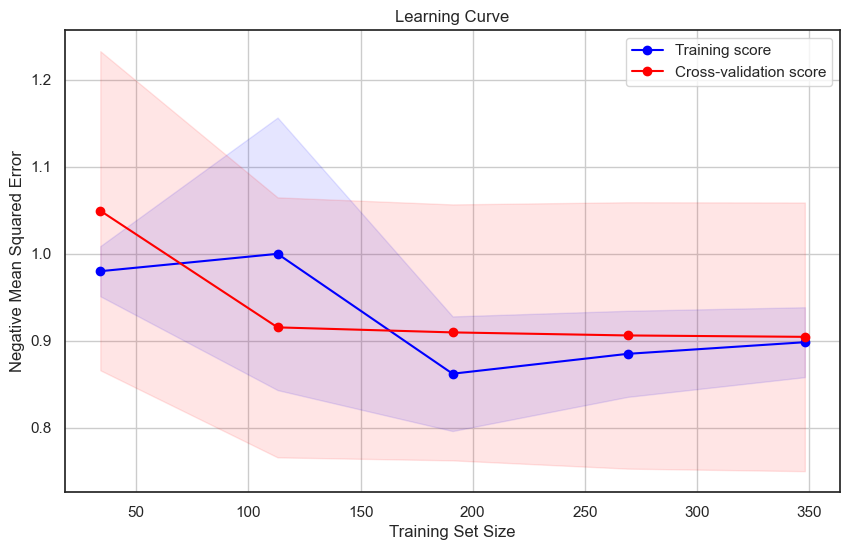

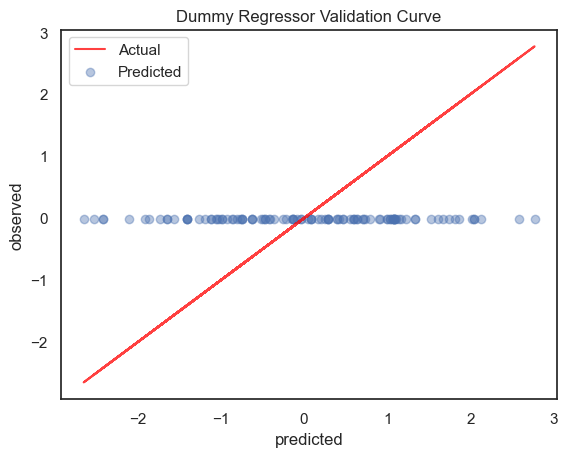

In [ ]:
# Dummy Regressor
data_preprocess_steps[step] = ('Model', DummyRegressor(strategy='mean'))

DummyClass = Pipeline(data_preprocess_steps)
DummyClass.fit(X_train, y_train)

y_pred = DummyClass.predict(X_test)

metrics(DummyRegressor(), X_train, y_train, X_test, y_test)
plot_validation_curve(y_test, y_pred, 'Dummy Regressor')

### Gradient Boosting Regressor

   R-squared       MSE       MAE      MAPE
0   0.922811  0.107939  0.237888  0.434049


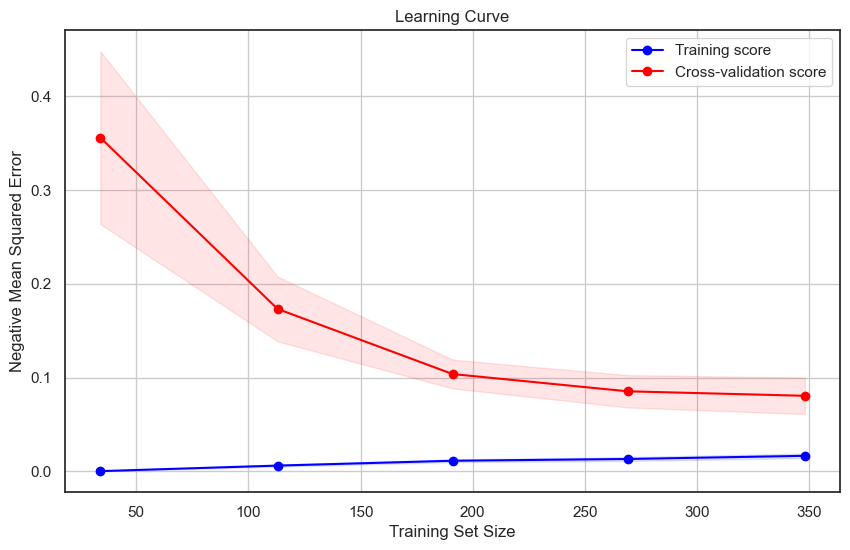

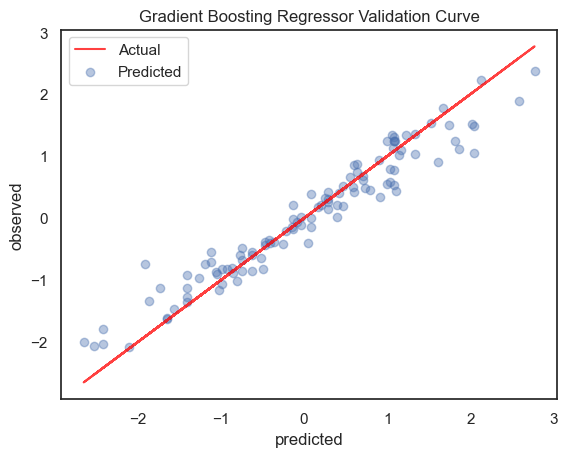

In [ ]:
# Gradient Boosting Regressor
data_preprocess_steps[step] = ('Model', GradientBoostingRegressor())

GBR = Pipeline(data_preprocess_steps)
GBR.fit(X_train, y_train)

y_pred = GBR.predict(X_test)

metrics(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)
plot_validation_curve(y_test, y_pred, 'Gradient Boosting Regressor')

### Neural Network

   R-squared       MSE       MAE      MAPE
0   0.835628  0.229855  0.368787  0.780017


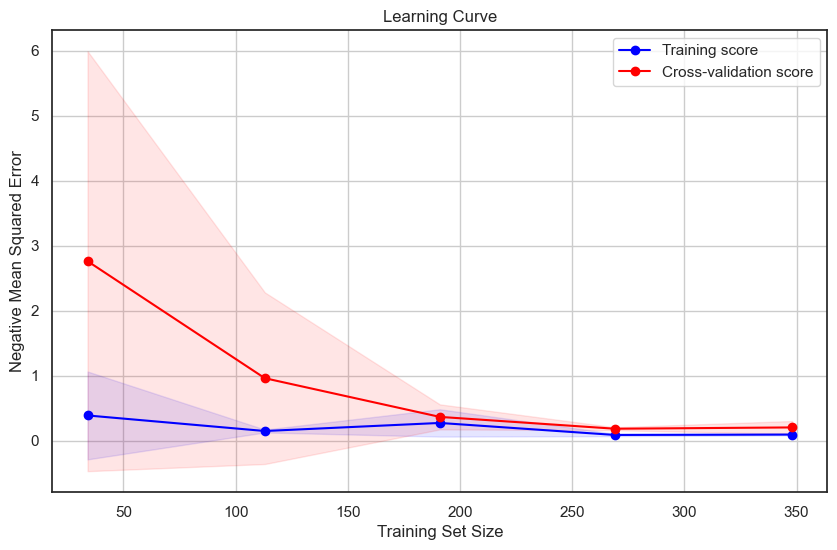

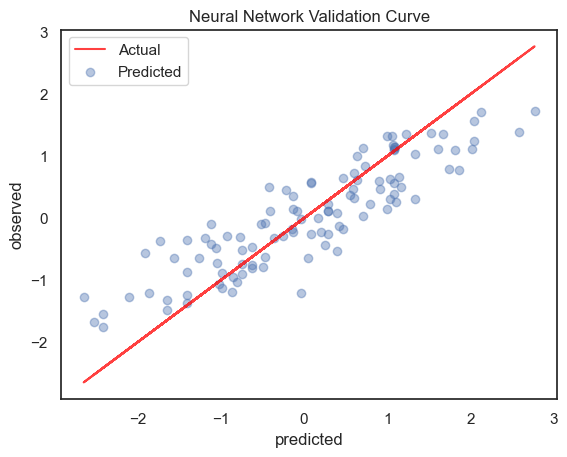

In [ ]:
# Neural Network	
data_preprocess_steps[step] = ('Model', MLPRegressor())

NN = Pipeline(data_preprocess_steps)
NN.fit(X_train, y_train)

y_pred = NN.predict(X_test)

metrics(MLPRegressor(), X_train, y_train, X_test, y_test)
plot_validation_curve(y_test, y_pred, 'Neural Network')

### Linear SVR	

   R-squared       MSE       MAE      MAPE
0   0.554863  0.622471  0.629979  1.383002


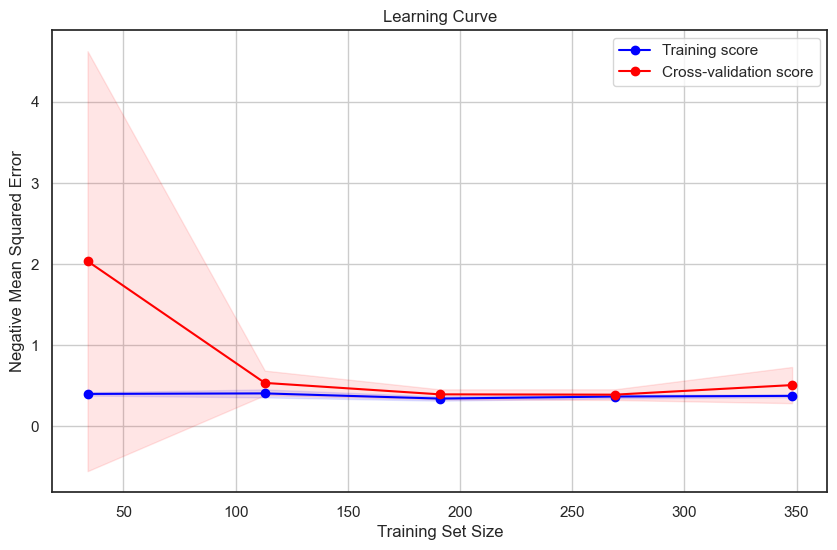

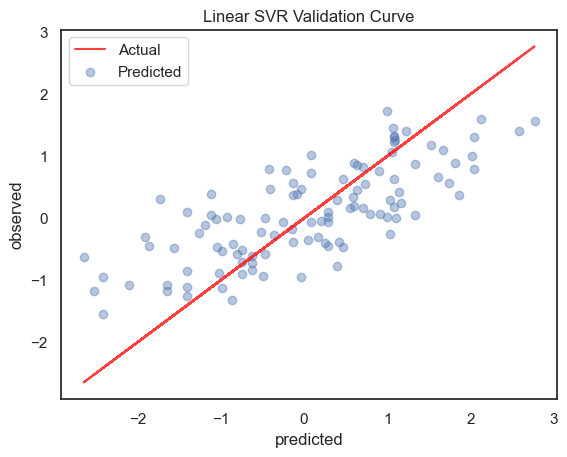

In [ ]:
# Linear SVR	
data_preprocess_steps[step] = ('Model', LinearSVR())

LSVR = Pipeline(data_preprocess_steps)
LSVR.fit(X_train, y_train)

y_pred = LSVR.predict(X_test)

metrics(LinearSVR(), X_train, y_train, X_test, y_test)
plot_validation_curve(y_test, y_pred, 'Linear SVR')

# Model Improvement
We will try to further improve the 3 models that we have chosen using hyperparameter tuning

Learning curve function

In [ ]:
def plot_learning_curve(estimator, X, y, cv):
    # Define the range of training set sizes to analyze
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative Mean Squared Error')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Cross-Validation Score')
    
    plt.legend(loc='best')
    plt.show()

### Hyper parameter tuning
We will be doing hyperparameter tuning on the model by using Grid Search and search through various parameters to find the best parameter for our model.

### Gradient Boosting Regressor

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


,best_score,best_params,score
0,-0.048873,"{'learning_rate': 0.1, 'max_depth': 4, 'max_fe...",-0.060278


   R-squared       MSE       MAE      MAPE
0   0.956895  0.060278  0.169336  0.298654


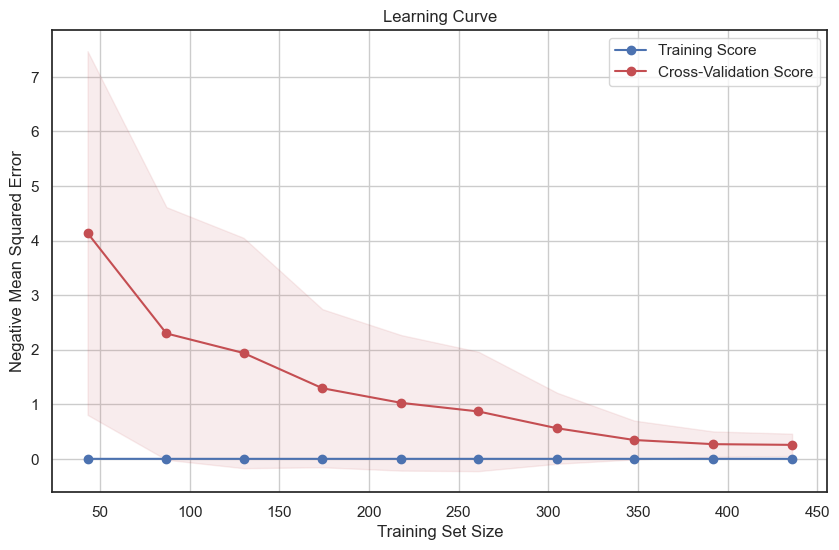


Elapsed Time 59.37842869758606



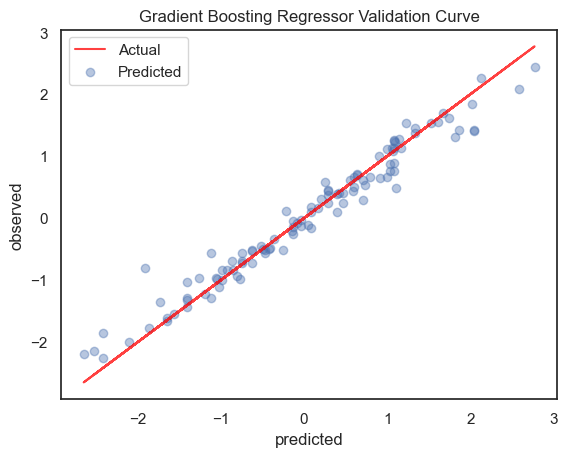

In [ ]:
start_time = time.time()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Gradient Boosting regressor
gbr = GradientBoostingRegressor()

# Create the GridSearchCV object
gbr_rg = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
gbr_rg.fit(X_train, y_train)

bestParameters = {'best_score': [gbr_rg.best_score_], 'best_params': [gbr_rg.best_params_], 'score': [gbr_rg.score(X_test, y_test)]}

display(pd.DataFrame(bestParameters))

# Get the best gradient boosting regressor 
best_gradient_boosting_regressor = gbr_rg.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_gradient_boosting_regressor.predict(X_test)

# Evaluate the best model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics
metrics = {'R-squared': [r2], 'MSE': [mse], 'MAE': [mae], 'MAPE': [mape]}

# Create a dataframe for metrics
df_metrics = pd.DataFrame(metrics)
print(df_metrics)


plot_learning_curve(best_gradient_boosting_regressor, X, y, cv=5)
plot_validation_curve(y_test, y_pred, 'Gradient Boosting Regressor')

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

We can see that Gradient Boosting Regressor after hyperparameter tuning performs well. <br/>
The model's R-squared score is 0.957 on average and has a very low MSE of 0.0601. <br/>
However the Gradient Boosting Regressor can be computationally expensive as shown above where the time taken is 57.6s. <br/>

### Neural Network

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,best_score,best_params,score
0,-0.068074,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.044246


   R-squared       MSE       MAE      MAPE
0   0.968359  0.044246  0.133829  0.378957


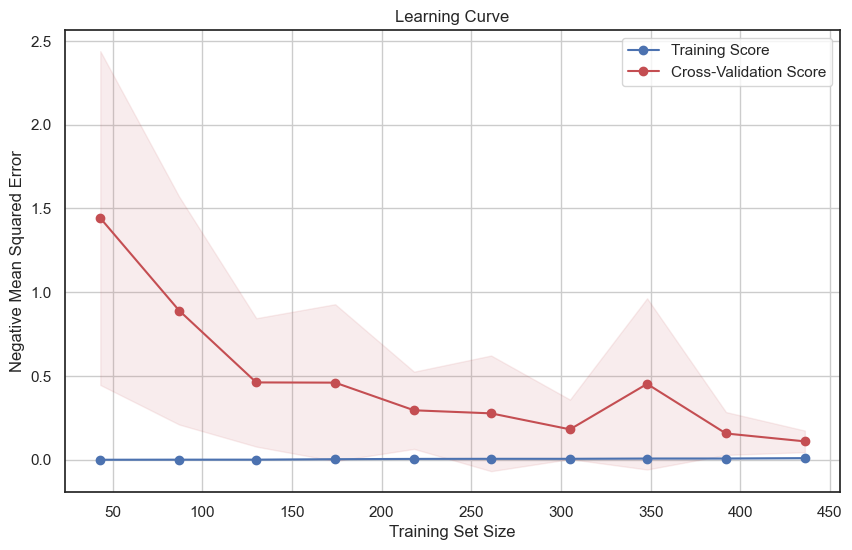


Elapsed Time 28.298337936401367



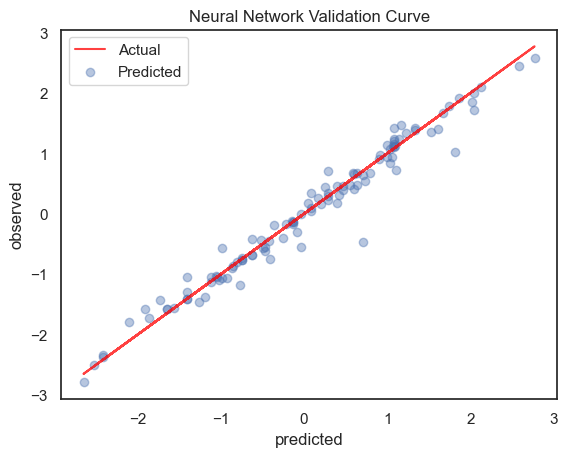

In [ ]:
start_time = time.time()

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the neural network regressor
neural_net = MLPRegressor(random_state=42)

# Create the GridSearchCV object
nn_rg = GridSearchCV(neural_net, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
nn_rg.fit(X_train, y_train)
    
bestParameters = {'best_score': [nn_rg.best_score_], 'best_params': [nn_rg.best_params_], 'score': [nn_rg.score(X_test, y_test)]}

display(pd.DataFrame(bestParameters))

# Get the best neural network model
best_neural_net = nn_rg.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_neural_net.predict(X_test)

# Evaluate the best model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics
metrics = {'R-squared': [r2], 'MSE': [mse], 'MAE': [mae], 'MAPE': [mape]}

# Create a dataframe for metrics
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# Perform learning curve analysis
plot_learning_curve(best_neural_net, X, y, cv=5)
plot_validation_curve(y_test, y_pred, 'Neural Network')

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

We can see that Neural Network after hyperparameter tuning performs well. <br/>
The model's R-squared score is 0.968 on average and has a very low MSE of 0.044. <br/>
The model also takes half the time that Gradient Boosting Regressor takes which is an added benefit as it saves on computation costs.

### Linear SVR

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,best_score,best_params,score
0,-0.472499,"{'C': 10, 'epsilon': 0.01}",-0.844484


   R-squared       MSE       MAE      MAPE
0   0.396099  0.844484  0.729198  1.543707


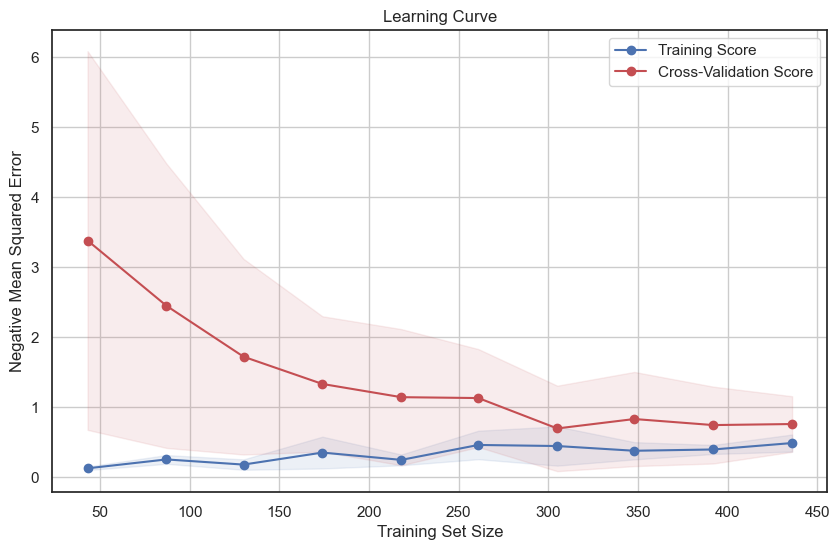


Elapsed Time 1.0211846828460693



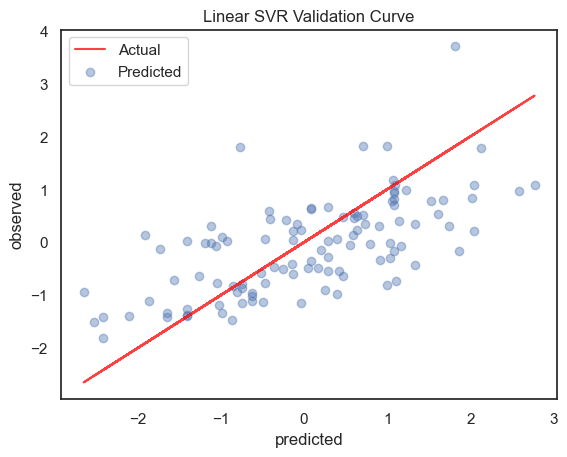

In [ ]:
start_time = time.time()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

# Create the support vector regressor regressor
svr = LinearSVR()

# Create the GridSearchCV object
svr_rg = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
svr_rg.fit(X_train, y_train)

bestParameters = {'best_score': [svr_rg.best_score_], 'best_params': [svr_rg.best_params_], 'score': [svr_rg.score(X_test, y_test)]}

display(pd.DataFrame(bestParameters))

# Get the best support vector regressor model
best_svr = svr_rg.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svr.predict(X_test)

# Evaluate the best model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics
metrics = {'R-squared': [r2], 'MSE': [mse], 'MAE': [mae], 'MAPE': [mape]}

# Create a dataframe for metrics
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

plot_learning_curve(best_svr, X, y, cv=5)
plot_validation_curve(y_test, y_pred, 'Linear SVR')

# Time tracked
print(f'\nElapsed Time {time.time() - start_time}\n')

We can see that Linear SVR after hyperparameter tuning is still below expectation. <br/>
The model's R-squared score is 0.526 on average and has a high MSE of 0.662. <br/>

## Final Model 
After hyper parameter tuning we have chosen Neural Network as our model

In [ ]:
bestParameters['best_params']

[{'C': 10, 'epsilon': 0.01}]

Putting best params into the model

In [ ]:
# Neural Network	
best_params = {
    'activation': 'relu',
    'alpha': 0.0001,
    'hidden_layer_sizes': (50, 50),
    'learning_rate': 'constant',
    'solver': 'lbfgs'
}

# Create the MLPRegressor model with the specified parameters
mlp_reg = MLPRegressor(**best_params)

# Define the pipeline with the model as the final step
data_preprocess_steps[step] = ('Model', mlp_reg)
NN = Pipeline(data_preprocess_steps)
NN.fit(X_train, y_train)

y_pred = NN.predict(X_test)

# Evaluate the best model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics
metrics = {'R-squared': [r2], 'MSE': [mse], 'MAE': [mae], 'MAPE': [mape]}
print(pd.DataFrame(metrics))

   R-squared       MSE       MAE      MAPE
0    0.95099  0.068535  0.178565  0.435053


### Model Evaluation
We will now be evaluating our final model's performance by showing varies plots to visualise our model

#### Learning curve
How the cross-validation score compares with the training score of our model as the training set size increases

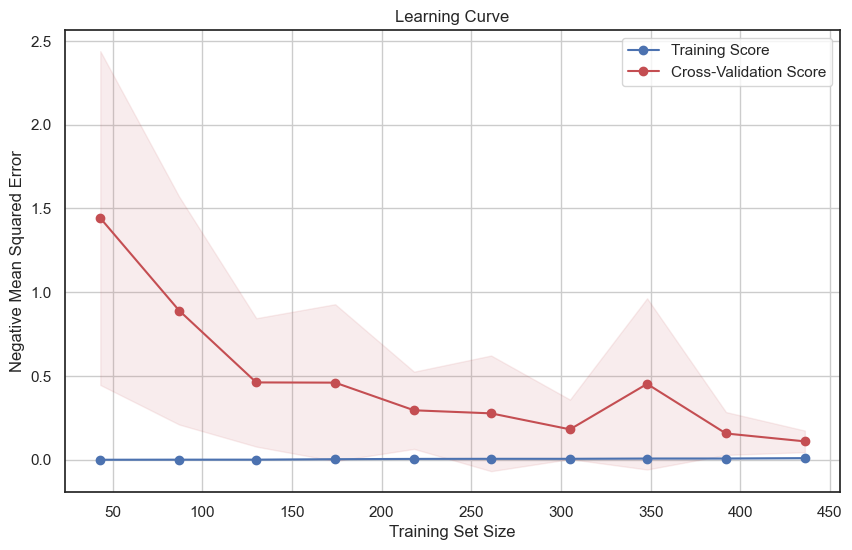

In [ ]:
plot_learning_curve(best_neural_net, X, y, cv=5)

The cross-validation cruve and training curve almost converges at a low negative mean squared error, indicating good model performance and generalization. <br/>
As for the spike that occurs for the cross-validation score, this can be attributed to the training set size being small and could mean that there is insufficient data which might lead to some minor inconsistencies.<br/>
But generally our model performs well while havinga comparatively low training time and does not really overfit the data.

#### Validation Curve
How the predicted price compares against the actual price.

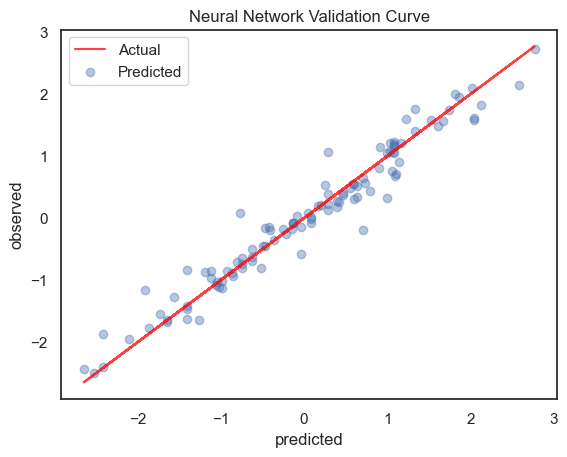

In [ ]:
plot_validation_curve(y_test, y_pred, 'Neural Network')

We can see from the plot above that the points have a tight cluster around the actual line which indicates that the model is a good fit.
<br/> This means that the model is good at accurately predicting the price of the houses.

#### Residual Plot

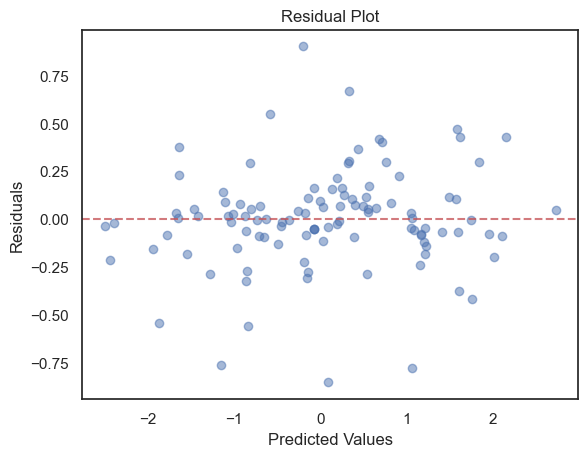

Mean of the residuals:
0.0018371208832802211


In [ ]:
residuals = y_test.values.flatten() - y_pred.flatten()
plt.scatter(y_pred.flatten(), residuals, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='--', alpha = 0.75)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
print(f'Mean of the residuals:\n{np.mean(residuals)}')

We can see that fromt he residual plot that the model has a slight tendency to under predict that are lower than the actual values.<br/>
This can be seen from the mean of the residuals above.<br/>
A possible explaination could be that the model is not able to capture very complex relationships in the data.

### Feature importances

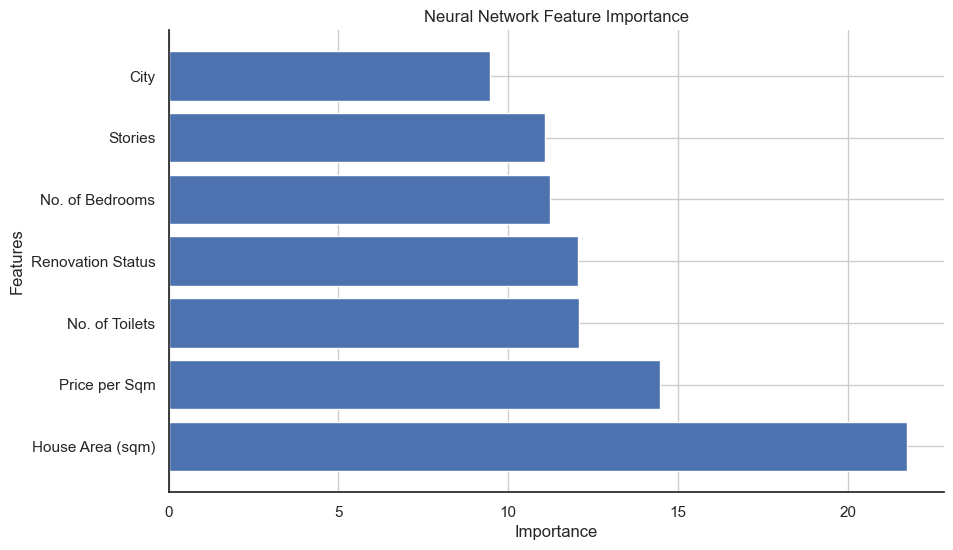

In [ ]:
weights = model.coefs_[0]  # Get the weights of the first layer (input layer to first hidden layer)

# Calculate the absolute feature importance based on the weights
feature_importance = np.abs(weights).sum(axis=1)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Get the feature names
feature_names = X_train.columns

# Plot the horizontal bar graph for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), feature_names[sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Neural Network Feature Importance')
plt.grid()
sns.despine()
plt.show()

We can see that the top 3 most important features for the model are:
- House Area (sqm)
- Price per Sqm
- Renovation Status 

## Conclusion
Our final model chosen is the Neural Network model as it is able to very accurately predict the prices of the houses. <br/>
While it may sometimes underpredict the price of houses, it is still very accurate and has a very low mean squared error.
Thus it can be useful for giving us a gauge of what to expect for the prices of certain houses. 